# Name:Padarthy Yagnesh Sai
# Reg.No:20BCE0625
# Labslot:L11+L12
# Question-2
2. Implement a logistic regression algorithm and test the algorithm using any data set of
your choice from the UCI repository. The output should include Accuracy, Error rate,
Precision, and recall rate along with the confusion matrix.

# Import Libraries

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('winequality-red.csv')
df = pd.read_csv('winequality-red.csv', delimiter=';')


In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
shape = df.shape
print(f"The shape of the data set is {shape}")


The shape of the data set is (1599, 12)


In [25]:
 df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
df['quality'] = np.where(df['quality'] > 5, 'good', 'not good')

In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [30]:
sc = StandardScaler()
X = sc.fit_transform(X)


In [31]:
 # Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [32]:
 # Model creation
classifier = LogisticRegression(random_state=0)


In [33]:
 # Fitting the model
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [34]:
 # Predict output
y_pred = classifier.predict(X_test)

In [35]:
 # Sample input predict
sample_input = X_test[0, :]
sample_output = classifier.predict(sample_input.reshape(1, -1))
print("Sample input: ", sample_input)
print("Sample output: ", sample_output)

Sample input:  [ 1.4250439  -0.32301294  0.81659759 -0.31132282  1.7753969   1.06389977
  0.59395426  0.77027994 -0.91431164  0.60105502  0.35389538]
Sample output:  ['good']


In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
# Error rate
error_rate = 1 - accuracy
print("Error rate: ", error_rate)
# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)
# Recall rate
recall = recall_score(y_test, y_pred, average='macro')
print("Recall rate: ", recall)
# Classification Report
print("Classification Report\n")
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[131  41]
 [ 39 109]]
Accuracy:  0.75
Error rate:  0.25
Precision:  0.7486274509803922
Recall rate:  0.7490571967316153
Classification Report

              precision    recall  f1-score   support

        good       0.77      0.76      0.77       172
    not good       0.73      0.74      0.73       148

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



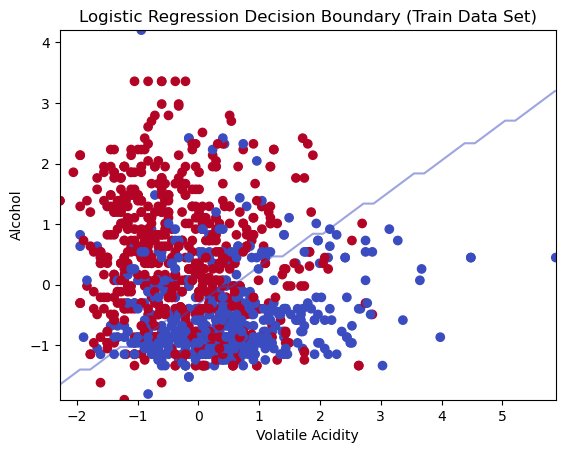

In [48]:
import matplotlib.pyplot as plt
# Plot decision boundary for train data set
X_train_plot = X_train[:, [1, 10]]
y_train_plot = (y_train == 'good').astype(int)
classifier.fit(X_train_plot, y_train_plot)
# Use 'cool' colormap for scatter plot
plt.scatter(X_train_plot[:, 0], X_train_plot[:, 1], c=y_train_plot, cmap='coolwarm')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.title('Logistic Regression Decision Boundary (Train Data Set)')
x1_min, x1_max = X_train_plot[:, 0].min(), X_train_plot[:, 0].max()
x2_min, x2_max = X_train_plot[:, 1].min(), X_train_plot[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
# Use 'cool' colormap for contour plot
plt.contour(xx1, xx2, Z, cmap='coolwarm', levels=[0], alpha=0.5)
plt.show()


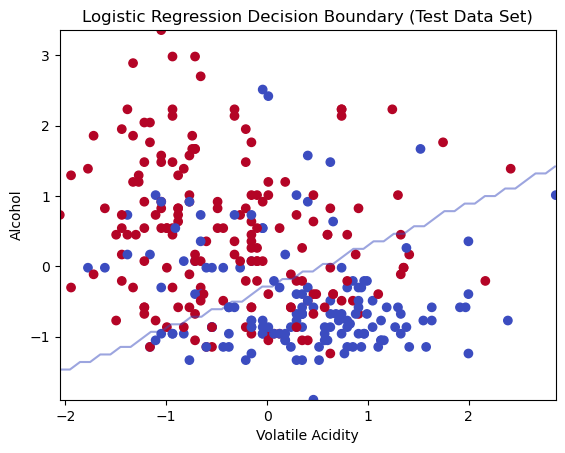

In [49]:
# Plot decision boundary for test data set
X_test_plot = X_test[:, [1, 10]]
y_test_plot = (y_test == 'good').astype(int)
y_pred_plot = classifier.predict(X_test_plot)

# Use 'coolwarm' colormap for scatter plot
plt.figure()
plt.scatter(X_test_plot[:, 0], X_test_plot[:, 1], c=y_test_plot, cmap='coolwarm')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.title('Logistic Regression Decision Boundary (Test Data Set)')

x1_min, x1_max = X_test_plot[:, 0].min(), X_test_plot[:, 0].max()
x2_min, x2_max = X_test_plot[:, 1].min(), X_test_plot[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Use 'coolwarm' colormap for contour plot
plt.contour(xx1, xx2, Z, cmap='coolwarm', levels=[0], alpha=0.5)

plt.show()
